# Análise Exploratória de Dados

## Importação de módulos

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Carregamento do dataset

In [82]:
df = pd.read_csv('products.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   name            10000 non-null  object 
 2   product_url     10000 non-null  object 
 3   part_number     10000 non-null  object 
 4   brand_name      10000 non-null  object 
 5   category        10000 non-null  object 
 6   price           10000 non-null  float64
 7   gross_weight    10000 non-null  float64
 8   width           10000 non-null  float64
 9   length          10000 non-null  float64
 10  warranty        10000 non-null  int64  
 11  material        10000 non-null  object 
 12  photo_url       10000 non-null  object 
 13  stock_quantity  10000 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [84]:
df.isnull().sum()

,0
id,0
name,0
product_url,0
part_number,0
brand_name,0
category,0
price,0
gross_weight,0
width,0
length,0


In [85]:
df.head(3)

,id,name,product_url,part_number,brand_name,category,price,gross_weight,width,length,warranty,material,photo_url,stock_quantity
0,1,CORREIA DENTADA,https://testdata.devmka.online/products/2d1781...,IJ273-9020A,MARELLI,Motor,642.30,14.10,24.8,11.3,12,Alumínio,https://picsum.photos/seed/IJ273-9020A/200/300,30
1,2,RADIADOR,https://testdata.devmka.online/products/9a660a...,DM993-9616K,MONROE,Sistema Elétrico,1087.82,2.38,43.3,77.9,12,Borracha Sintética,https://picsum.photos/seed/DM993-9616K/200/300,188
2,3,DISCO DE FREIO,https://testdata.devmka.online/products/703a94...,FD839-7112R,NGK,Filtros,827.46,13.06,14.3,15.2,12,Borracha Sintética,https://picsum.photos/seed/FD839-7112R/200/300,0


## Análise de frequência em ordem decrescente

### Top 5 marcas mais frequentes

In [86]:
df['brand_name'].value_counts()[:5]

,count
brand_name,
MONROE,1461
SKF,1453
ACDELCO,1436
BREMBO,1422
NGK,1415


### Top 5 categorias mais frequentes

In [87]:
df['category'].value_counts()[:5]

,count
category,
Sistema Elétrico,1688
Suspensão e Direção,1677
Transmissão,1676
Filtros,1657
Freios,1654


### Top 5 produtos mais frequentes

In [88]:
df['name'].value_counts()[:5]

,count
name,
BATERIA AUTOMOTIVA,549
FILTRO DE ÓLEO,534
BICO INJETOR,531
MOTOR DE PARTIDA,521
ROLAMENTO DE RODA,521


### Top 5 materiais mais frequentes

In [89]:
df['material'].value_counts()[:5]

,count
material,
Aço Carbono,2546
Cerâmica,2517
Alumínio,2502
Borracha Sintética,2435


## Análise de ruptura de estoque (déficit no abastecimento)

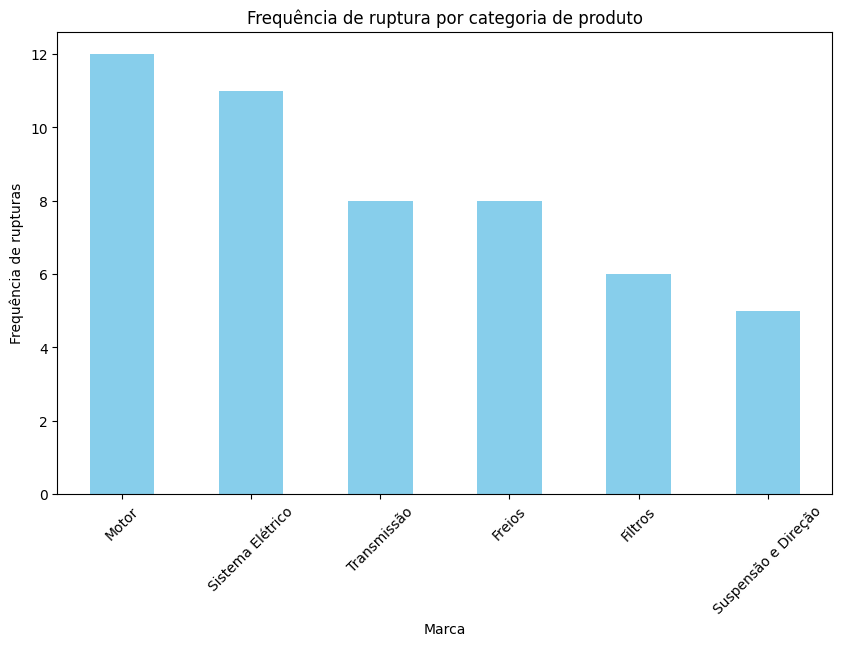

In [90]:
df_ruptura_category = df[df['stock_quantity'] == 0].groupby('category')['stock_quantity'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
df_ruptura_category.plot(kind='bar', color='skyblue')
plt.title('Frequência de ruptura por categoria de produto')
plt.xlabel('Marca')
plt.ylabel('Frequência de rupturas')
plt.xticks(rotation=45)
plt.show()

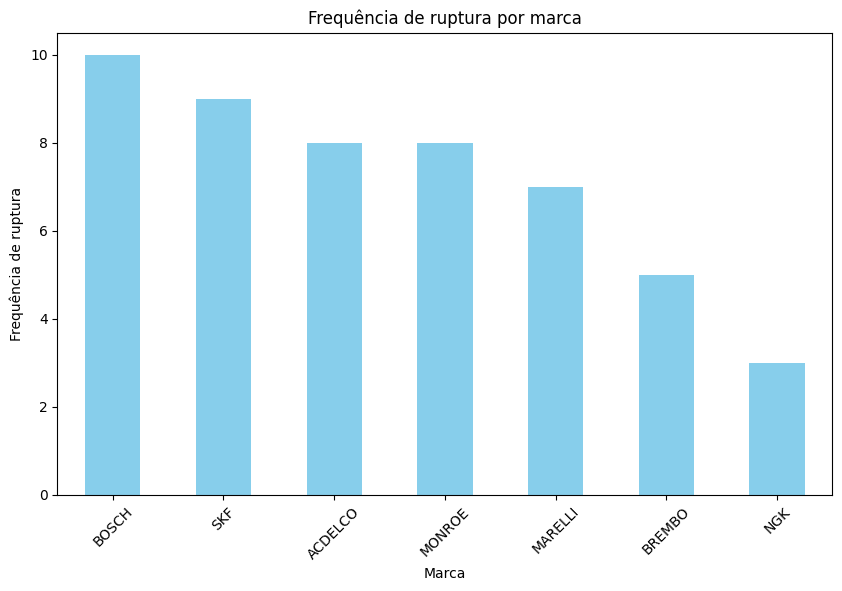

In [91]:
df_ruptura_brand = df[df['stock_quantity'] == 0].groupby('brand_name')['stock_quantity'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
df_ruptura_brand.plot(kind='bar', color='skyblue')
plt.title('Frequência de ruptura por marca')
plt.xlabel('Marca')
plt.ylabel('Frequência de ruptura')
plt.xticks(rotation=45)
plt.show()

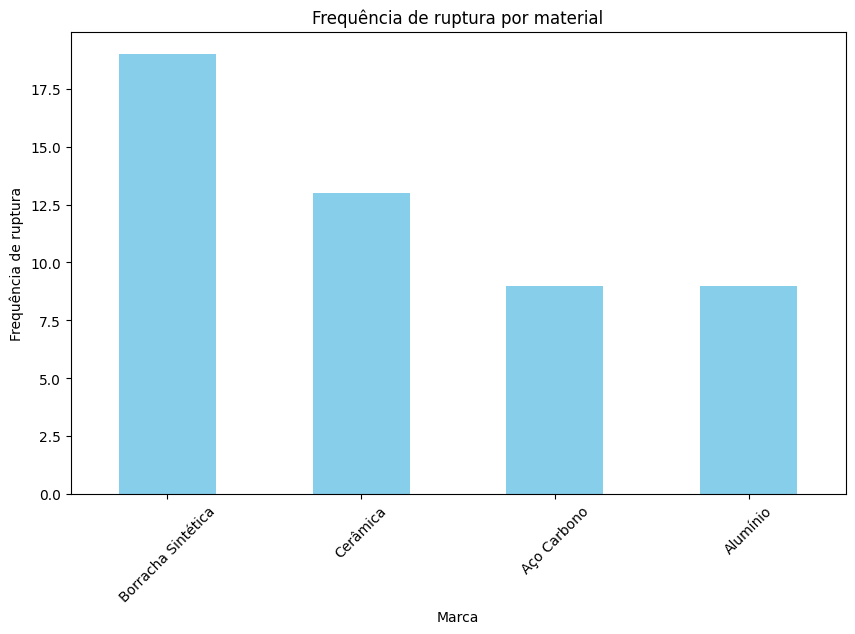

In [92]:
df_ruptura_material = df[df['stock_quantity'] == 0].groupby('material')['stock_quantity'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
df_ruptura_material.plot(kind='bar', color='skyblue')
plt.title('Frequência de ruptura por material')
plt.xlabel('Marca')
plt.ylabel('Frequência de ruptura')
plt.xticks(rotation=45)
plt.show()

## Análise de nível de estoque por atributo

### Nível de estoque por categoria de produtos

In [93]:
df.groupby('category')['stock_quantity'].sum().sort_values(ascending=False)

,stock_quantity
category,
Transmissão,170244
Suspensão e Direção,168876
Sistema Elétrico,167906
Filtros,164664
Motor,164334
Freios,161574


### Nível de estoque por fabricantes dos produtos

In [94]:
df.groupby('brand_name')['stock_quantity'].sum().sort_values(ascending=False)

,stock_quantity
brand_name,
MONROE,147016
ACDELCO,144938
SKF,143599
NGK,142797
BOSCH,140656
MARELLI,140132
BREMBO,138460


### Nível de estoque por material

In [95]:
df.groupby('material')['stock_quantity'].sum().sort_values(ascending=False)

,stock_quantity
material,
Aço Carbono,254737
Cerâmica,251924
Alumínio,248828
Borracha Sintética,242109


## Análise de preço de produtos

### Análise de preço por fabricante

In [96]:
df.groupby('brand_name').agg(
    min_price=('price', 'min'),
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    std_price=('price', 'std'))

,min_price,avg_price,max_price,std_price
brand_name,,,,
ACDELCO,50.22,766.138155,1498.47,414.978824
BOSCH,51.13,767.099745,1499.73,419.350757
BREMBO,50.10,771.569318,1498.15,417.665094
MARELLI,50.29,779.685728,1495.82,420.650284
MONROE,50.44,764.765551,1498.29,420.002960
NGK,51.96,747.875145,1499.45,411.697128
SKF,50.10,779.131308,1498.29,411.938134


### Análise de preço por material

In [97]:
df.groupby('material').agg(
    min_price=('price', 'min'),
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    std_price=('price', 'std'))

,min_price,avg_price,max_price,std_price
material,,,,
Alumínio,50.51,767.010328,1499.73,415.471139
Aço Carbono,50.44,761.300471,1498.36,415.367633
Borracha Sintética,51.13,758.749663,1499.50,415.184242
Cerâmica,50.10,784.902825,1498.47,420.101509


### Análise de preço por categoria de produto

In [98]:
df.groupby('category').agg(
    min_price=('price', 'min'),
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    std_price=('price', 'std'))

,min_price,avg_price,max_price,std_price
category,,,,
Filtros,50.22,747.763983,1499.50,424.364556
Freios,51.08,767.281941,1499.73,408.656286
Motor,51.13,774.326857,1499.52,422.143372
Sistema Elétrico,50.51,781.748525,1499.45,416.020327
Suspensão e Direção,50.10,766.286565,1495.00,406.811034
Transmissão,50.10,770.651963,1498.29,421.263893


## Análise de tempo de garantia

### Análise de garantia por fabricante

In [99]:
df.groupby('brand_name').agg(
    min_warrant=('warranty', 'min'),
    max_warrant=('warranty', 'max')
    )

,min_warrant,max_warrant
brand_name,,
ACDELCO,12,12
BOSCH,12,12
BREMBO,12,12
MARELLI,12,12
MONROE,12,12
NGK,12,12
SKF,12,12


### Análise de garantia por material

In [100]:
df.groupby('material').agg(
    min_warrant=('warranty', 'min'),
    max_warrant=('warranty', 'max'))

,min_warrant,max_warrant
material,,
Alumínio,12,12
Aço Carbono,12,12
Borracha Sintética,12,12
Cerâmica,12,12


## Análise de desvio padrão de dimensões

In [101]:
df.groupby('brand_name').agg(
    min_weight=('gross_weight', 'min'),
    avg_weight=('gross_weight', 'mean'),
    max_weight=('gross_weight', 'max'),
    weight_std=('gross_weight', 'std'),
).fillna(0)

,min_weight,avg_weight,max_weight,weight_std
brand_name,,,,
ACDELCO,0.10,7.486825,14.99,4.244574
BOSCH,0.11,7.660454,14.99,4.359572
BREMBO,0.10,7.436435,15.00,4.261954
MARELLI,0.10,7.413488,14.97,4.282439
MONROE,0.11,7.641027,14.99,4.246019
NGK,0.11,7.549187,14.98,4.169711
SKF,0.12,7.615100,14.99,4.266771


In [102]:
df.groupby('category').agg(
    min_weight=('gross_weight', 'min'),
    avg_weight=('gross_weight', 'mean'),
    max_weight=('gross_weight', 'max'),
    weight_std=('gross_weight', 'std'),
).fillna(0)

,min_weight,avg_weight,max_weight,weight_std
category,,,,
Filtros,0.10,7.639529,15.00,4.326544
Freios,0.12,7.422358,14.99,4.256166
Motor,0.10,7.526013,14.99,4.246840
Sistema Elétrico,0.11,7.474970,14.98,4.300398
Suspensão e Direção,0.11,7.611592,14.99,4.152005
Transmissão,0.11,7.588389,15.00,4.287061


In [103]:
df.groupby('material').agg(
    min_weight=('gross_weight', 'min'),
    avg_weight=('gross_weight', 'mean'),
    max_weight=('gross_weight', 'max'),
    weight_std=('gross_weight', 'std'),
).fillna(0)

,min_weight,avg_weight,max_weight,weight_std
material,,,,
Alumínio,0.10,7.535488,14.99,4.231446
Aço Carbono,0.10,7.476893,15.00,4.226727
Borracha Sintética,0.11,7.553655,14.99,4.305882
Cerâmica,0.11,7.610477,15.00,4.284394


In [104]:
df.groupby('brand_name').agg(
    min_width=('width', 'min'),
    avg_width=('width', 'mean'),
    max_width=('width', 'max'),
    width_std=('width', 'std')
).fillna(0)

,min_width,avg_width,max_width,width_std
brand_name,,,,
ACDELCO,5.1,27.858565,50.0,13.092283
BOSCH,5.0,26.966974,50.0,12.982209
BREMBO,5.0,27.442475,50.0,13.042283
MARELLI,5.0,27.720114,50.0,12.868820
MONROE,5.0,27.907940,50.0,12.877548
NGK,5.0,27.883392,50.0,12.929519
SKF,5.0,27.041638,50.0,13.215515


In [105]:
df.groupby('category').agg(
    min_width=('width', 'min'),
    avg_width=('width', 'mean'),
    max_width=('width', 'max'),
    width_std=('width', 'std')
).fillna(0)

,min_width,avg_width,max_width,width_std
category,,,,
Filtros,5.0,27.650634,50.0,13.005286
Freios,5.1,27.703144,50.0,12.989798
Motor,5.0,27.862682,50.0,13.174192
Sistema Elétrico,5.0,27.040403,50.0,12.819280
Suspensão e Direção,5.0,27.526416,50.0,13.131867
Transmissão,5.0,27.506146,49.9,12.907128


In [106]:
df.groupby('material').agg(
    min_width=('width', 'min'),
    avg_width=('width', 'mean'),
    max_width=('width', 'max'),
    width_std=('width', 'std')
).fillna(0)

,min_width,avg_width,max_width,width_std
material,,,,
Alumínio,5.0,27.341327,50.0,13.041817
Aço Carbono,5.0,27.976041,50.0,12.903412
Borracha Sintética,5.0,27.417248,50.0,13.046455
Cerâmica,5.0,27.439849,50.0,13.023637


In [107]:
df.groupby('brand_name').agg(
    min_length=('length', 'min'),
    avg_length=('length', 'mean'),
    max_length=('length', 'max'),
    length_std=('length', 'std')
).fillna(0)

,min_length,avg_length,max_length,length_std
brand_name,,,,
ACDELCO,10.1,53.340390,100.0,25.751323
BOSCH,10.2,54.612615,100.0,25.972335
BREMBO,10.1,54.877426,99.9,25.993790
MARELLI,10.1,55.856776,99.9,25.241600
MONROE,10.1,55.391786,100.0,25.693365
NGK,10.0,54.404452,100.0,25.737687
SKF,10.0,55.322299,100.0,25.658642


In [108]:
df.groupby('category').agg(
    min_length=('length', 'min'),
    avg_length=('length', 'mean'),
    max_length=('length', 'max'),
    length_std=('length', 'std')
).fillna(0)

,min_length,avg_length,max_length,length_std
category,,,,
Filtros,10.0,54.588715,100.0,25.614138
Freios,10.1,55.443289,100.0,25.391048
Motor,10.1,55.112561,100.0,25.771938
Sistema Elétrico,10.0,54.054088,100.0,26.115439
Suspensão e Direção,10.1,54.210316,100.0,26.014319
Transmissão,10.0,55.584069,100.0,25.432244


In [109]:
df.groupby('material').agg(
    min_length=('length', 'min'),
    avg_length=('length', 'mean'),
    max_length=('length', 'max'),
    length_std=('length', 'std')
).fillna(0)

,min_length,avg_length,max_length,length_std
material,,,,
Alumínio,10.1,55.139648,100.0,25.641293
Aço Carbono,10.0,54.671131,100.0,25.805503
Borracha Sintética,10.0,55.164230,100.0,25.514067
Cerâmica,10.0,54.357608,100.0,25.940337


## Conclusões

Com base nos resultados obtidos, é possível concluir que:

a) As frequências das categorias associadas aos atributos analisados apresentam comportamento semelhante.

b) A ruptura de estoque ocorre com maior frequência nas categorias “Motor” e “Sistema Elétrico”. Sob a perspectiva de marca, “BOSCH” e “SKF” são as que mais apresentam ruptura; já em relação ao material, destacam-se “Borracha sintética” e “Cerâmica”. Isso sugere uma aplicação direta do Princípio de Pareto (regra 80/20): ao focar esforços para solucionar a ruptura nessas poucas categorias e marcas vitais (como BOSCH e SKF), é possível presumir que estaremos resolvendo a grande maioria (potencialmente 80%) do problema geral de falta de estoque.

c) A soma acumulada do estoque por categoria dos atributos também revela padrões parecidos entre si.

d) Os preços apresentam amplitudes e distribuição estatística semelhantes, considerando o desvio padrão próximo entre as categorias.

e) Não há variação no tempo de garantia quando analisado sob cada um dos atributos considerados.

f) O mesmo comportamento descrito no item 'd)' é observado nas variáveis contínuas 'gross_weight', 'width' e 'length'.